In [133]:
import pandas as pd
import numpy as np
import re
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns

In [106]:
def convert_currency(amount):

    number = float(re.search(r'\s(\d+\.\d+)', amount).group(1))

    currency = amount[:3]
    if currency != "EUR":
        if currency == "BOB":
            conv = 8.3725
        elif currency == "DKK":
            conv = 7.4374
        elif currency == "GEL":
            conv = 3.8279
        elif currency == "INR":
            conv = 88.6972
        elif currency == "JOD":
            conv = 0.8585
        elif currency == "KES":
            conv = 130.5909
        elif currency == "LKR":
            conv = 239.5998
        elif currency == "NGN":
            conv = 498.8897
        elif currency == "NPR":
            conv = 142.5807
        elif currency == "TRY":
            conv = 10.1572
        elif currency == "USD":
            conv = 1.2108
        elif currency == "ZAR":
            conv = 16.6102
        else:
            print("warning, non-defined currency in dataset")
            conv = 1

        number = number / conv

    return number

def check_search_term(description, search_terms):
    for term in search_terms:
        if term in description:
            return 1
    return 0

In [107]:
#Reading the data
folder = Path("/Users/nielskreuk/Dropbox/DataScience/Exercises/NYCDSA/ScrapingProject/fmo/scrapeddata")
file_to_open = folder / "fmo.csv"
cols = pd.read_csv(file_to_open, sep=";", nrows=1).columns
df = pd.read_csv(file_to_open, sep=";", usecols=cols[:6]) #Leave out couple of empty columns at end of file

In [108]:
#add a column with converted amounts in EUR as numbers
df["mEUR_amounts"] = [convert_currency(amount) for amount in df["amount"]]

In [109]:
#Test investments for being other fund rather than direct
search_terms = ["fund", "vehicle"]
df["fund"] = [check_search_term(description, search_terms) for description in df["description"]]

#Test climate
search_terms = ["green", "renewable", "climate", "sustainable", "environmental"]
df["climate"] = [check_search_term(description, search_terms) for description in df["description"]]

#Test economic inclusion
search_terms = ["inclusive", "inclusion", "affordable housing", "empowerment", "microfinance", "smallholder", "ineqaulity", "sme", "smes", "small and medium sized enterprise", "family-owned", "low-income", "job opportunities", "mid-market", "middle-market", "early stage", "unemployment", "local enterprise", "medium-sized", "lower mid-cap"]
df["inclusion"] = [check_search_term(description, search_terms) for description in df["description"]]

#Test economic growth
search_terms = ["economic growth", " gdp growth", "economic development", "emerging", "upcoming", "efficiency", "readily available", "ecosystem"]
df["economic_growth"] = [check_search_term(description, search_terms) for description in df["description"]]

#Test gender
search_terms = ["gender", "female", "women"]
df["gender"] = [check_search_term(description, search_terms) for description in df["description"]]

#Test human rights
search_terms = ["equal rigths", "human rights", "justice", "governance", "labor standards", "hse"]
df["human_rights"] = [check_search_term(description, search_terms) for description in df["description"]]

#Test education
search_terms = ["education"]
df["education"] = [check_search_term(description, search_terms) for description in df["description"]]

#Test food security
search_terms = ["food security", "hunger", "clean water", "drinking water"]
df["food_security"] = [check_search_term(description, search_terms) for description in df["description"]]



#Check multi-goal investments
df["num_goals"] = df["inclusion"] + df["food_security"] + df["climate"] + df["gender"] + df["human_rights"] + df["education"] + df["economic_growth"]
mask_multi = (df["num_goals"] > 1)
mask_noGoals = (df["num_goals"] == 0)

In [110]:
file_to_write = folder / "fmo_categorized.csv"
df.to_csv(file_to_write, sep=";")

In [111]:
print(df["num_goals"].sum())

1648


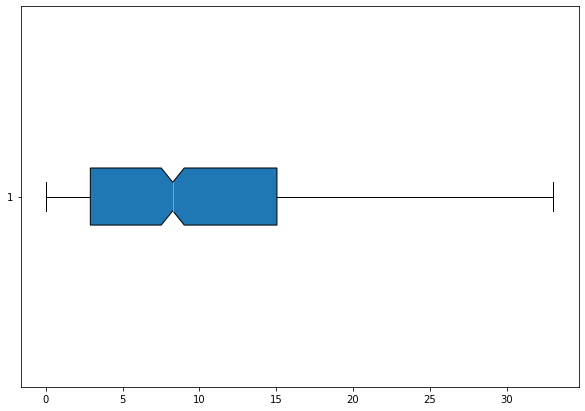

In [112]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plot_data = df.loc[(df["fund"] == 1), ["mEUR_amounts"]] # df.loc[(df["fund"] == 0), ["EUR_amounts"]]
bp = ax.boxplot(plot_data, patch_artist = True,
                notch ='True', vert = 0, showfliers = False)
plt.show()

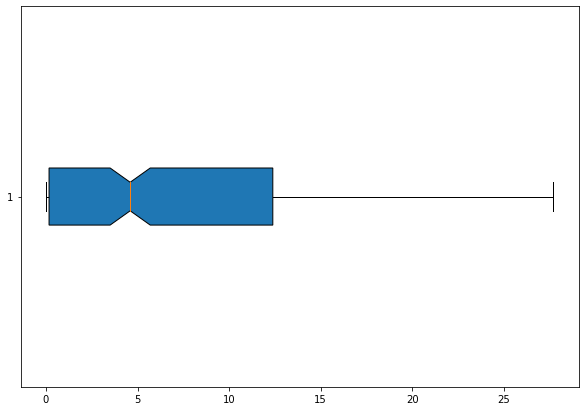

In [113]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
plot_data = df.loc[(df["fund"] == 0), ["mEUR_amounts"]] 
bp = ax.boxplot(plot_data, patch_artist = True,
                notch ='True', vert = 0, showfliers = False)
plt.show()

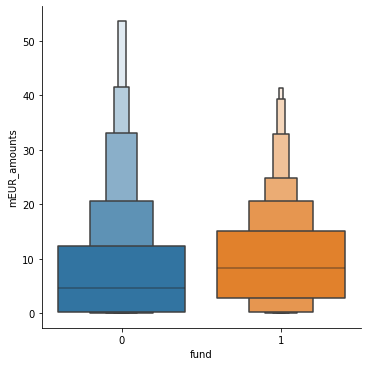

In [114]:
sns.catplot(x="fund", y="mEUR_amounts", kind="boxen", data=df, showfliers = False)

In [115]:
#Grab counting columns
plot_data_goals = df.iloc[: , 8:15]
#plot_data_goals

In [116]:
#Calculate amount columns
plot_data_amount = plot_data_goals.mul(df["mEUR_amounts"], axis=0) 
#plot_data_amount

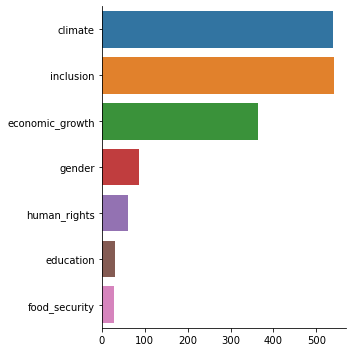

In [117]:
sns.catplot(kind="bar", data=plot_data_goals, ci = None, estimator=sum, orient = "h")

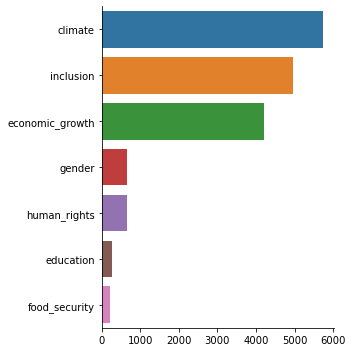

In [118]:
sns.catplot(kind="bar", data=plot_data_amount, ci = None, estimator=sum, orient = "h")

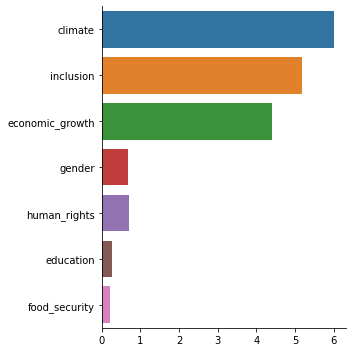

In [132]:
sns.catplot(kind="bar", data=plot_data_amount, ci = None, orient = "h")

<AxesSubplot:xlabel='fund', ylabel='mEUR_amounts'>

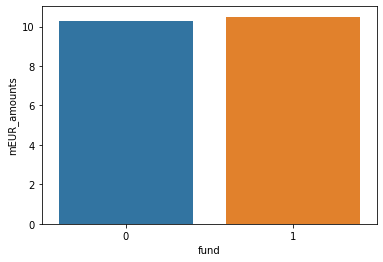

In [119]:
sns.barplot(data=df, x="fund", y="mEUR_amounts", ci = None)

<AxesSubplot:xlabel='fund', ylabel='mEUR_amounts'>

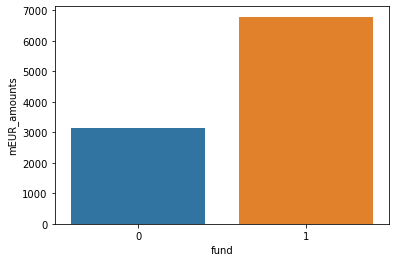

In [120]:
sns.barplot(data=df, x="fund", y="mEUR_amounts", ci = None,estimator=sum)

<AxesSubplot:xlabel='fund', ylabel='count'>

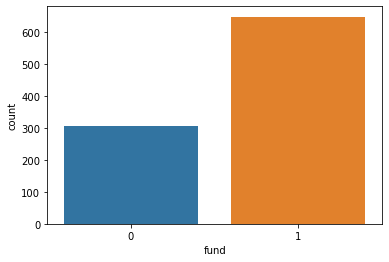

In [121]:
sns.countplot(data=df, x="fund")

<AxesSubplot:xlabel='num_goals', ylabel='mEUR_amounts'>

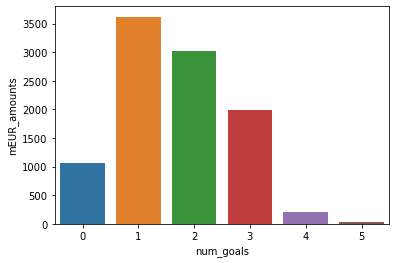

In [122]:
sns.barplot(data=df, x="num_goals", y="mEUR_amounts", ci = None,estimator=sum)

<AxesSubplot:xlabel='num_goals', ylabel='count'>

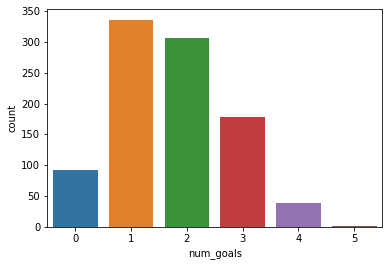

In [124]:
sns.countplot(data=df, x="num_goals")

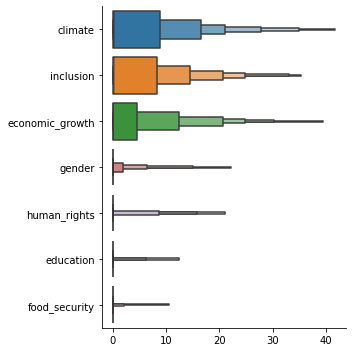

In [126]:
sns.catplot(kind="boxen", data=plot_data_amount, showfliers = False, orient = "h")

In [247]:
category_sums = plot_data_amount.sum(axis=0)
category_sums_single = plot_data_amount.mul((df["num_goals"] == 1), axis=0).sum(axis=0)
single_fraction = category_sums_single / category_sums
single_fraction.sort_values(ascending=False, inplace=True)

In [251]:
single_fraction = np.array(single_fraction).reshape(-1,1).T
single_fraction = pd.DataFrame(single_fraction, columns = ["climate", "inclusion", "economic_growth", "gender", "human_rights", "education", "food_security"])

<AxesSubplot:>

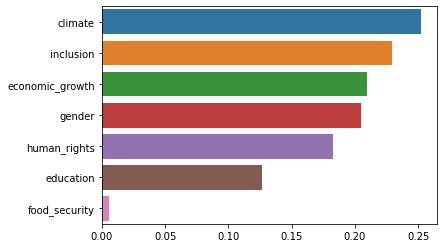

In [253]:
sns.barplot(data=single_fraction, ci = None, orient = "h")